In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [21]:
def func_fx(x):
    fx= x ** 5 - 5*x ** 3 + 10*x ** 2 - 5*x #моя функция
    return fx

In [33]:
def update_interior(a,b):               #новый отрезок и новые точки
    d = (b - a)/((np.sqrt(5) + 1) / 2)
    x1 = a+d
    x2 = b-d
    return x1,x2

In [34]:
def find_min(a,b,x1,x2):
    fx1=func_fx(x1)                     #значение функции в точке x1
    fx2=func_fx(x2)                     #значение функции в точке x2
    if fx2 > fx1:                       #если fx2 > fx1
        a = x2                          #x2 становится точкой a
        b = b                           #точка b остается прежней
        new_x = update_interior(a,b)    #считаем новое значение для x
        x1 = new_x[0]                   #новое значение для x1 (т.е. первое число из return)
        x2 = new_x[1]                   #новое значение для x2 (т.е. второе число из return)
        x_min=x1                        #x1 наша точка минимума
        
    else:                               #иначе
        a = a                           #точка a остается прежней
        b = x1                          #верхняя граница становится точкой x1
        new_x = update_interior(a,b)    #считаем новое значение для x
        x1 = new_x[0]                   #новое значение для x1 (т.е. первое число из return)
        x2 = new_x[1]                   #новое значение для x2 (т.е. второе число из return)
        x_min = x2                      #x2 наша точка минимума
    return a,b,x_min

In [35]:
def plot_graph(a,b,x1,x2, e):
    '''Начиная с определенного значения ошибки, точки на графике стоят очень близко друг к другу, из-за чего 
    график становится неразборчивым. Чтобы это предотвратить, я уменьшил размерность x до [-3,-2.94] для ошибок < 0.8.
    '''
    if e > 0.8: 
        #график
        plt.plot(x,y)
        plt.plot([-3.0,-2.0],[0,0],'k')
    
        #точка x1 
        plt.plot(x1,func_fx(x1),'ro',label='x1')
        plt.plot([x1,x1],[0,func_fx(x1)],'k')
    
        #точка x2 
        plt.plot(x2,func_fx(x2),'bo',label='x2')
        plt.plot([x2,x2],[0,func_fx(x2)],'k')

        #линия a 
        plt.plot([a,a],[0,func_fx(a)])
        plt.annotate('a', xy = (a-0.01,-0.2))
        
        #линия b 
        plt.plot([b,b],[0,func_fx(b)])
        plt.annotate('b', xy = (b-0.01,-0.2)) 
        
        #линия x1 
        plt.plot([x1,x1],[0,func_fx(x1)],'k')
        plt.annotate('x1',xy = (x1-0.01,-0.2))
        
        #линия x2 
        plt.plot([x2,x2],[0,func_fx(x2)],'k')
        plt.annotate('x2',xy = (x2-0.01,-0.2))
    
        plt.show()
    else:
        #plot  graph
        plt.plot(xx,yy)
        plt.plot([-3.0,-2.94], [0,0], 'k')
    
        #plot x1 point
        plt.plot(x1,func_fx(x1),'ro',label = 'x1')
        plt.plot([x1,x1], [0,func_fx(x1)],'k')
    
        #plot x2 point
        plt.plot(x2,func_fx(x2),'bo',label='x2')
        plt.plot([x2,x2], [0, func_fx(x2)], 'k')

        #plot a line
        plt.plot([a, a],[0, func_fx(a)])
        plt.annotate('a', xy = (a-0.001, 0.2))
        
        #plot b line
        plt.plot([b, b],[0, func_fx(b)])
        plt.annotate('b', xy = (b-0.001, 0.2)) 
        
        #plot x1 line
        plt.plot([x1,x1],[0,func_fx(x1)],'k')
        plt.annotate('x1', xy = (x1-0.001, 0.2))
        
        #plot x2 line
        plt.plot([x2,x2],[0,func_fx(x2)],'k')
        plt.annotate('x2', xy = (x2-0.001, 0.2))
    
        #y-axis limit
        plt.show()

In [36]:
def golden_search(a,b,eps):
    it = 0                                  #подсчет итераций
    e = 1
    while e >= eps:                          #пока ошибка не станет меньше 0.1 (в нашем случае), проводим итерации
        new_x=update_interior(a,b)
        x1 = new_x[0]
        x2 = new_x[1]
        fx1 = func_fx(x1)
        fx2 = func_fx(x2)
        plot_graph(a,b,x1,x2, e)              #Построение графика
        plt.show()
        '''На каждой итерации ищется минимум. Значения, полученные в результате нахождения минимума, задаются для a,b 
        и точки минимума. Так, для a выводится [0] (т.е. первое) число из return, для b - второе, для точки минимума - третье'''
        
        new_boundary = find_min(a,b,x1,x2) 
        a = new_boundary[0]                      
        b = new_boundary[1]
        x_min = new_boundary[2]
        
        it+=1                                  
        print ('Итерация №: ', it)
        r = (np.sqrt(5)-1) / 2                        #Золотое сечение
        e = ((1 - r) * (abs((b - a) / x_min))) * 100  #Ошибка для полученных в результате работы алгоритма a, b и точки минимума
        print('Ошибка: ', e)
    print(x_min)                                      #выводим итоговую точку минимума
    print(func_fx(x_min))                             #выводим итоговое значение функции в точке минимума

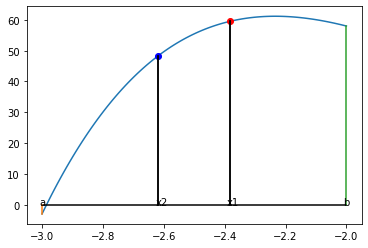

Итерация №:  1
Ошибка:  8.541019662496845


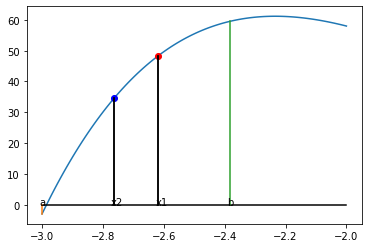

Итерация №:  2
Ошибка:  5.111871806809576


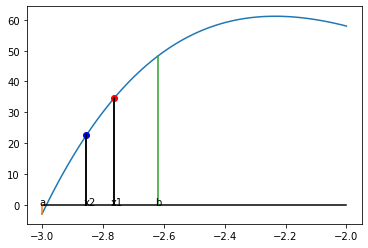

Итерация №:  3
Ошибка:  3.0988044664595686


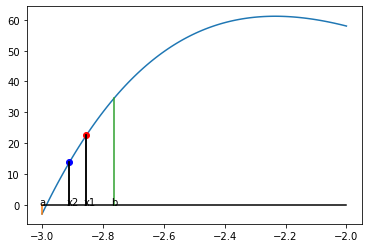

Итерация №:  4
Ошибка:  1.8927630227215348


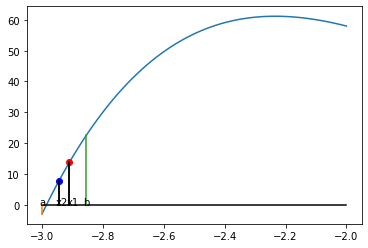

Итерация №:  5
Ошибка:  1.1613953276272597


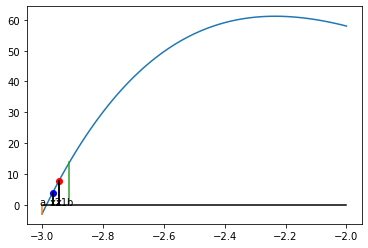

Итерация №:  6
Ошибка:  0.7146116727048669


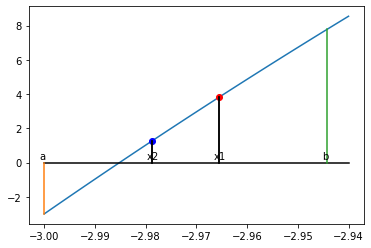

Итерация №:  7
Ошибка:  0.44045205613952076


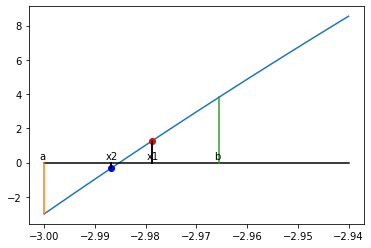

Итерация №:  8
Ошибка:  0.27175714310101345


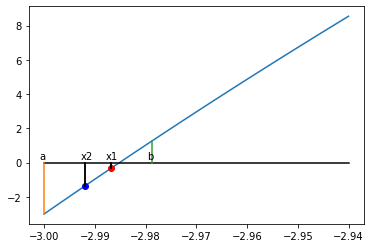

Итерация №:  9
Ошибка:  0.1677809911110571


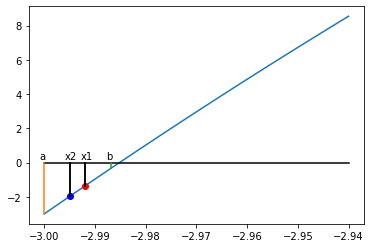

Итерация №:  10
Ошибка:  0.10362794350988859


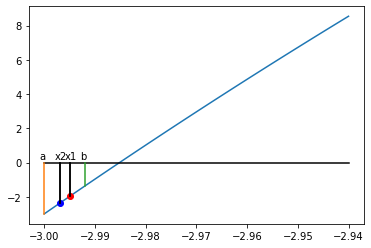

Итерация №:  11
Ошибка:  0.06402025055229081
-2.9980806212745006
-2.6073188235982716


In [37]:
x = np.linspace(-3,-2,100)       #пространство для x от -3 до -2
xx = np.linspace(-3,-2.94,100)   #пространство для x от -3 до -2.94 (ошибка < 0.8)
y = func_fx(x)                   #y = моя функция на [-3; 2]
yy = func_fx(xx)                 #yy = моя функция на [-3; 2.94]

golden_search(-3,-2, 0.1)        #применение алгоритма золотого сечения для [-3,-2] с ошибкой 0.1

In [38]:
def object_function(xk):
    f = (1+2*(xk[0]**2)+(xk[1]**2))**(1/2)+math.exp(((xk[0]**2)+(2*xk[1]**2)))-xk[0]-xk[1]
    return f
 
def gradient_function(xk):
 
    grad = np.array([
        2*xk[0]*math.exp(((xk[0]**2)+(2*xk[1]**2)))+2*xk[0]*(1+2*(xk[0]**2)+(xk[1]**2))**(-1/2)-1,
        4*xk[1]*math.exp(((xk[0]**2)+(2*xk[1]**2)))+xk[1]*(1+2*(xk[0]**2)+(xk[1]**2))**(-1/2)-1
    ])
    return grad

In [39]:
#https://en.wikipedia.org/wiki/Wolfe_conditions

def wolfe_powell(xk, h):
    alpha = 1.0                   #берем начальное значение альфы = 1
    a = 0.0                       #temp-альфа
    b = -100000                   #вообще тут должно быть очень большое отрицательное число, но в нашем случае оно не пригодится
    c_1 = 0.01                    #в википедии написано, что c1 обычно берут за 0.01, а c2 за 0.9
    c_2 = 0.9                     #т.е. c1 должно быть приближено к 0, а c2 к единице
    k = 0
    while k < 100:
        print('alpha = ', alpha)
        k += 1
        #проверка выполнения первого условия
        if object_function(xk) - object_function(xk + alpha * h) >= -c_1 * alpha * np.dot(gradient_function(xk), h):
            print ('Условие 1 выполнено')
            #проверка выполнения второго условия
            if np.dot(gradient_function(xk + alpha * h), h) >= c_2 * np.dot(gradient_function(xk), h):
                print ('Условие 2 выполнено')
                return alpha
            else:
                print('Условие 2 не выполнено')
                a = alpha
                alpha = min(2 * alpha, (alpha + b) / 2)
        else:
            print('Условие 1 не выполнено')
            b = alpha
            alpha = 0.5 * (alpha + a) #уменьшаем alpha
    return alpha

def conjugate_gradient(x0, eps):
    xk = x0
    grad = gradient_function(xk)                   #градиент
    sigma = np.linalg.norm(grad)
    h = -grad                                      #h, при этом помним, что h0 = -f'(x0)
    step = 0                                       #шаг
    w = np.zeros ((2, 10))                         #Сохраняем итерацию и устанавливаем переменную xk
 
    while sigma > eps and step < 10:               #пока |df(x_k)/dx_i| больше 10^-3    
        w[:, step] = xk                            # xk
        step += 1
        alpha = wolfe_powell(xk, h)                #ищем альфу по условию Вольфе
        xk = xk + alpha * h                        #считаем xk
        g0 = grad                                  #градиент для x_k-1
        grad = gradient_function(xk)
        beta = (np.linalg.norm(grad) / np.linalg.norm(g0))**2      #ищем beta по алгоритму Флетчера-Ривса
        h0 = h
        h = -1 * grad + beta * h                                #h_k = -f'(x_k) + beta_k-1 * h_k-1
        sigma = np.linalg.norm(grad)                           #условие df(x_k)/dx_i 
        print('Итерация № {}, результат: {}, значение функции: {:.4f}'.format(step, np.array(xk),object_function(xk)))
    return w

alpha =  1.0
Условие 1 не выполнено
alpha =  0.5
Условие 1 не выполнено
alpha =  0.25
Условие 1 выполнено
Условие 2 выполнено
Итерация № 1, результат: [0.25 0.25], значение функции: 1.7960
alpha =  1.0
Условие 1 не выполнено
alpha =  0.5
Условие 1 не выполнено
alpha =  0.25
Условие 1 выполнено
Условие 2 выполнено
Итерация № 2, результат: [0.25871645 0.1652916 ], значение функции: 1.7829
alpha =  1.0
Условие 1 не выполнено
alpha =  0.5
Условие 1 не выполнено
alpha =  0.25
Условие 1 выполнено
Условие 2 выполнено
Итерация № 3, результат: [0.24322794 0.1840916 ], значение функции: 1.7814
alpha =  1.0
Условие 1 не выполнено
alpha =  0.5
Условие 1 не выполнено
alpha =  0.25
Условие 1 выполнено
Условие 2 выполнено
Итерация № 4, результат: [0.24176191 0.18232348], значение функции: 1.7814
alpha =  1.0
Условие 1 не выполнено
alpha =  0.5
Условие 1 не выполнено
alpha =  0.25
Условие 1 выполнено
Условие 2 выполнено
Итерация № 5, результат: [0.24182758 0.1829318 ], значение функции: 1.7814
Точки x

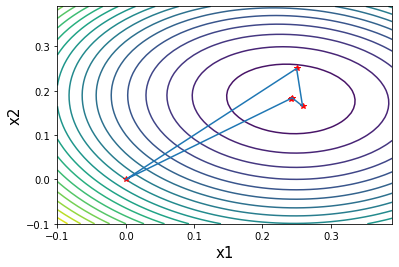

In [40]:
if __name__ == '__main__':
    eps = 1e-3                            #заканчиваем вычисления при eps = 10^-3
    x0 = np.array([0.0, 0.0])
    
         # Алгоритм сопряженного градиента
    W = conjugate_gradient(x0, eps)
    print('Точки x1: ', W [0,:5])         
    print('Точки x2: ', W [1,:5])
 
         # Нарисуйте изображение целевой функции
    X1 = np.arange(-0.1, 0.4, 0.01)
    X2 = np.arange(-0.1, 0.4, 0.01)
    [x1, x2] = np.meshgrid(X1, X2) 
    
    f = (1 + 2*(x1 ** 2)+(x2 ** 2))**(1/2) + 2.718**(((x1 ** 2) + (2 * x2 **2))) - x1 - x2  # заданная функция
    
    plt.contour (x1, x2, f, 20) # контурные линии функции
    plt.plot (W [0,:5], W [1,:5], 'r *', W [0,:6], W [1,:6]) # Рисуем траекторию сходимости точки итерации
    plt.xlabel('x1', fontsize=15)
    plt.ylabel('x2', fontsize=15)

    plt.show()